Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ahera\AaPython\ML\diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

df.isnull().sum()

### Outlier Detection

<Axes: >

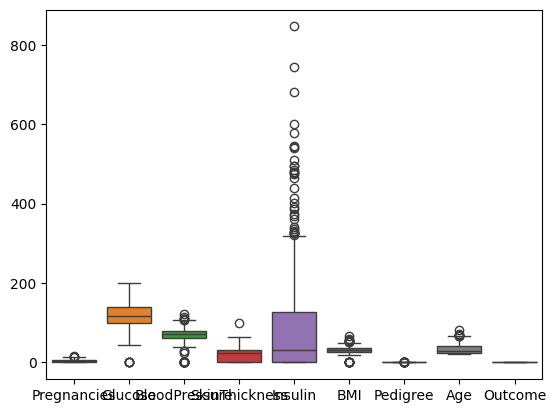

In [19]:
import seaborn as sns 
sns.boxplot(df)

In [20]:
df.shape

(768, 9)

In [21]:
# --- Handle Outliers using IQR method ---
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Keep only data points within 1.5*IQR range
df_clean = df[~((df < (Q1 - 1 * IQR)) | (df > (Q3 + 1* IQR))).any(axis=1)]

print("Original dataset shape:", df.shape)
print("After removing outliers:", df_clean.shape)

Original dataset shape: (768, 9)
After removing outliers: (532, 9)


<Axes: >

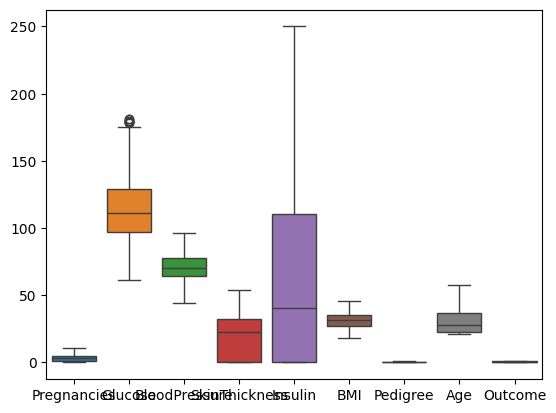

In [22]:
sns.boxplot(df_clean)

<Axes: ylabel='BMI'>

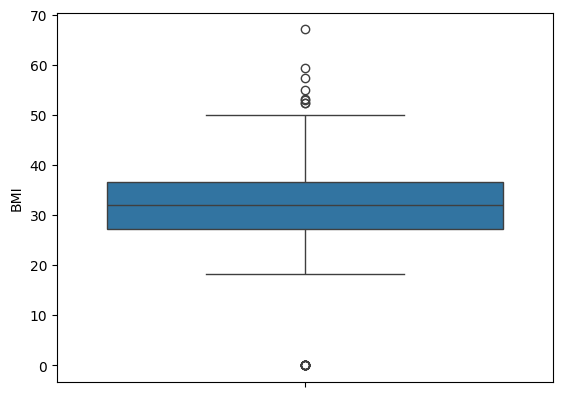

In [23]:
sns.boxplot(df['BMI'])

<Axes: ylabel='BMI'>

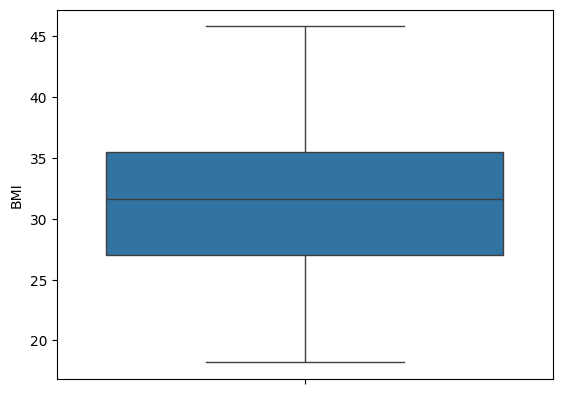

In [24]:
sns.boxplot(df_clean['BMI'])

### Target variable

In [31]:
X = df_clean.drop(["Outcome"],axis=1)
y = df_clean['Outcome']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Optimal K Value

In [55]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

error_rates = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error = 1-accuracy_score(y_test,y_pred)
    error_rates.append(error)



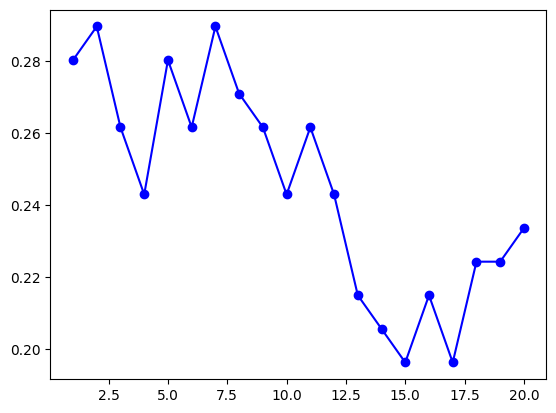

In [57]:
plt.plot(range(1,21),error_rates, marker='o',color="b")
plt.show()

In [58]:
# --- Choose best K (where curve bends) ---
best_k = error_rates.index(min(error_rates)) + 1
print("Optimal value of K (Elbow Point):", best_k)

Optimal value of K (Elbow Point): 15


In [59]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Error Rate: ",1-accuracy_score(y_test,y_pred))

Accuracy:  0.7663551401869159
Precision:  1.0
Recall:  0.24242424242424243
Error Rate:  0.23364485981308414


In [60]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[74  0]
 [25  8]]


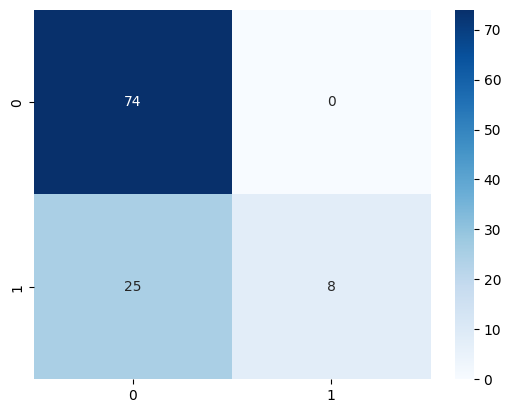

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap="Blues", fmt="d")
plt.show()